In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

In [81]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [82]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

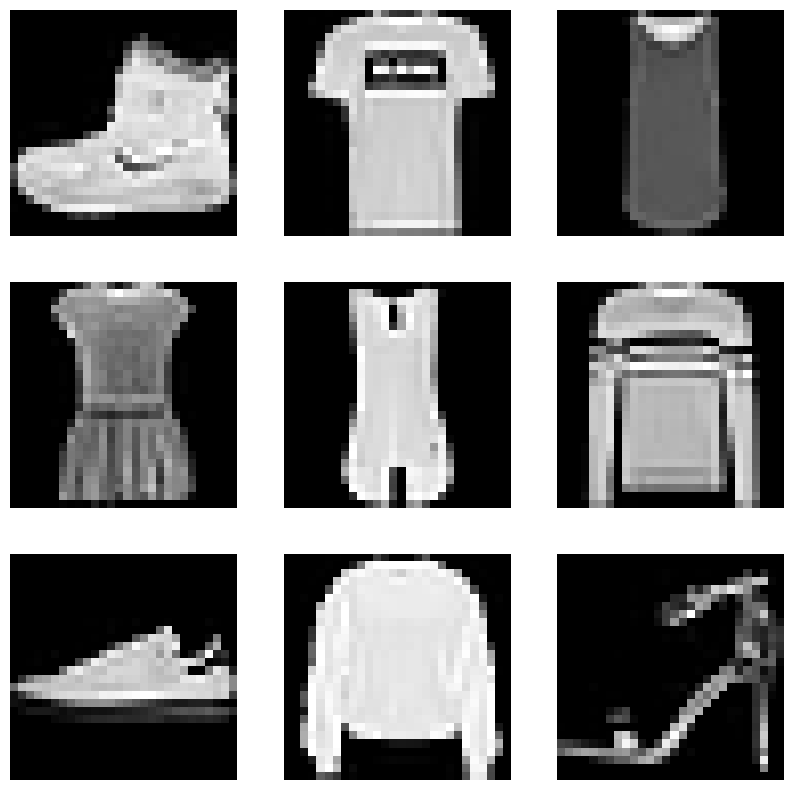

In [83]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    # plt.title(f"Class: {class_names[y_train[i]]}")
    plt.axis('off')
plt.show()

In [84]:
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(class_names, counts))

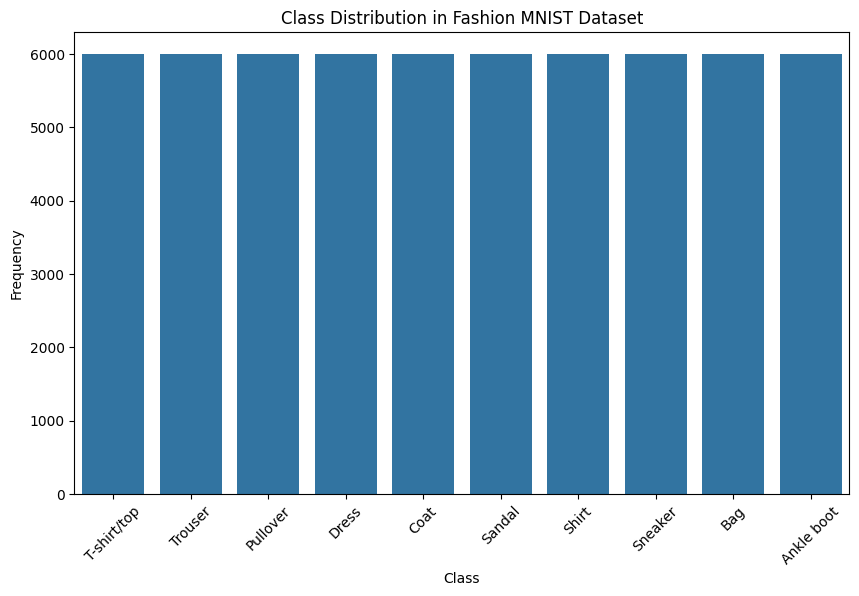

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Fashion MNIST Dataset")
plt.xticks(rotation=45)
plt.show()

In [86]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [87]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [88]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.7737 - accuracy: 0.4311 - val_loss: 1.3359 - val_accuracy: 0.6261
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1084 - accuracy: 0.6661 - val_loss: 0.9355 - val_accuracy: 0.7010
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8632 - accuracy: 0.7186 - val_loss: 0.7939 - val_accuracy: 0.7401
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7586 - accuracy: 0.7521 - val_loss: 0.7145 - val_accuracy: 0.7628
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6945 - accuracy: 0.7733 - val_loss: 0.6630 - val_accuracy: 0.7802
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6485 - accuracy: 0.7897 - val_loss: 0.6239 - val_accuracy: 0.7926
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6130 - accuracy: 0.7994 - val_loss: 0.5951 - val_accuracy:

In [91]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.8095
Test accuracy: 80.95%


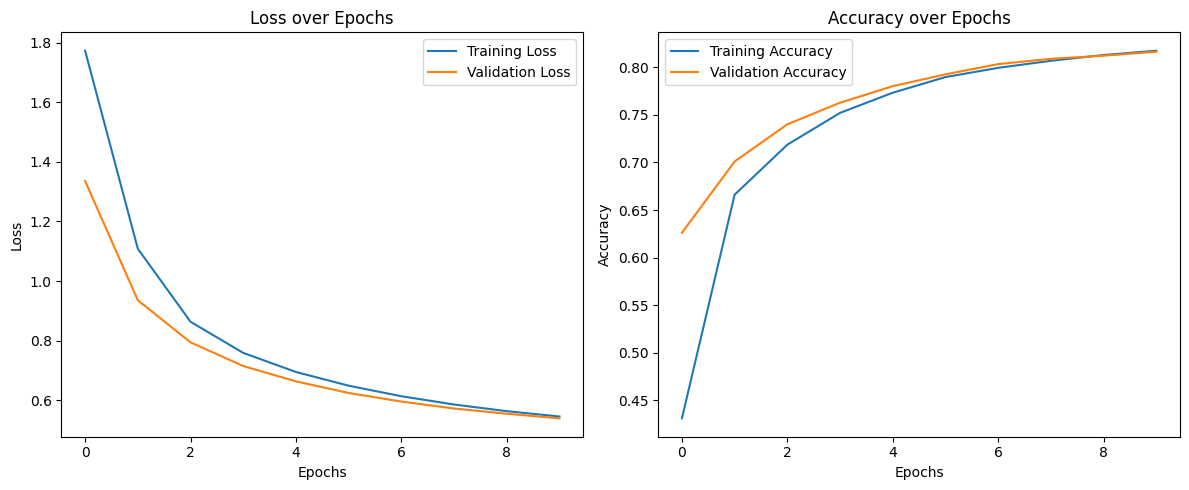

In [92]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5528 - accuracy: 0.8034 - val_loss: 0.4814 - val_accuracy: 0.8317
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4489 - accuracy: 0.8378 - val_loss: 0.4495 - val_accuracy: 0.8390
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4340 - accuracy: 0.8458 - val_loss: 0.4756 - val_accuracy: 0.8319
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4179 - accuracy: 0.8496 - val_loss: 0.4459 - val_accuracy: 0.8430
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4086 - accuracy: 0.8532 - val_loss: 0.4692 - val_accuracy: 0.8428
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3957 - accuracy: 0.8577 - val_loss: 0.4274 - val_accuracy: 0.8541
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3893 - accuracy: 0.8607 - val_loss: 0.4360 - val_accuracy:

In [95]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8509
Test accuracy: 85.09%


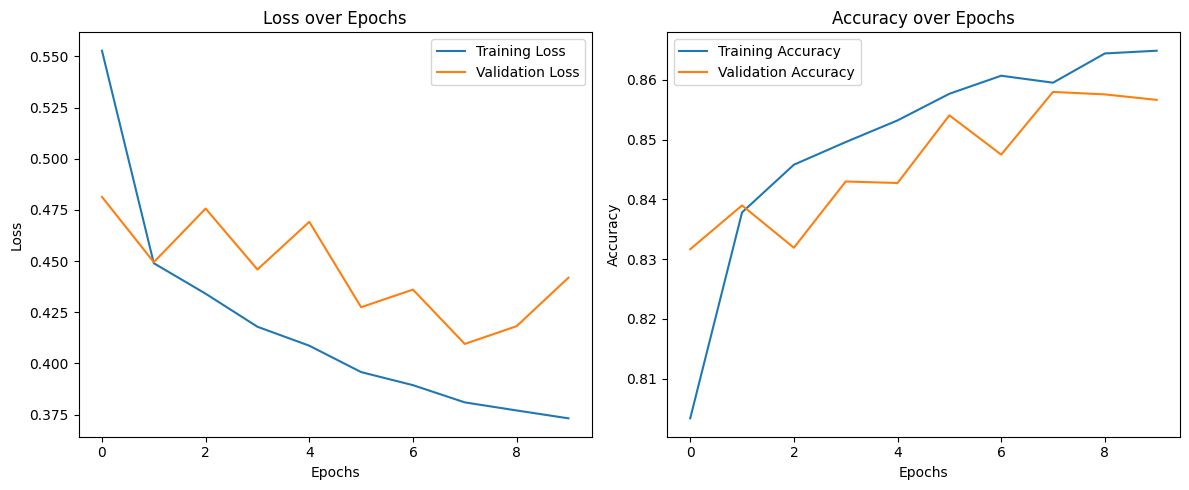

In [96]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0395 - accuracy: 0.2360 - val_loss: 2.3112 - val_accuracy: 0.0983
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3163 - accuracy: 0.1009 - val_loss: 2.3067 - val_accuracy: 0.1030
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3155 - accuracy: 0.1009 - val_loss: 2.3107 - val_accuracy: 0.1003
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3156 - accuracy: 0.1007 - val_loss: 2.3088 - val_accuracy: 0.1027
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3158 - accuracy: 0.0985 - val_loss: 2.3272 - val_accuracy: 0.1003
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3163 - accuracy: 0.0997 - val_loss: 2.3138 - val_accuracy: 0.1027
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3151 - accuracy: 0.1014 - val_loss: 2.3137 - val_accuracy:

In [99]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 1ms/step - loss: 2.3117 - accuracy: 0.1000
Test accuracy: 10.00%


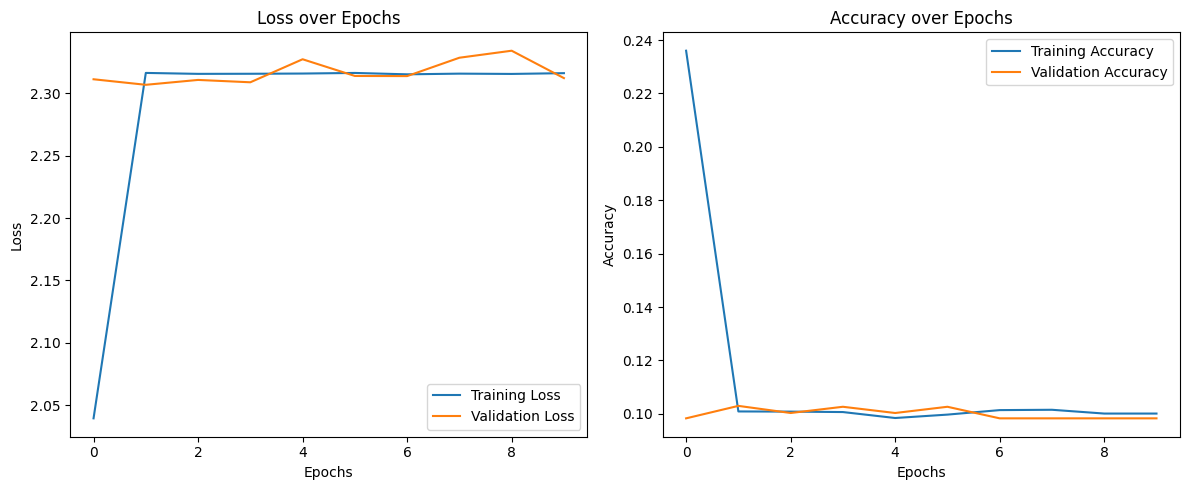

In [100]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
    configs = [
        {'neurons': 64, 'activation': 'relu'},
        {'neurons': 128, 'activation': 'relu'},
        {'neurons': 256, 'activation': 'relu'},
        {'neurons': 128, 'activation': 'tanh'},
        {'neurons': 128, 'activation': 'sigmoid'},
        {'neurons': 256, 'activation': 'sigmoid'}
    ]

In [102]:
def train_model(neurons, activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    return history

In [103]:
histories = []
for config in configs:
    print(f"Training model with {config['neurons']} neurons and {config['activation']} activation")
    history = train_model(config['neurons'], config['activation'])
    histories.append((config, history))

Training model with 64 neurons and relu activation
Training model with 128 neurons and relu activation
Training model with 256 neurons and relu activation
Training model with 128 neurons and tanh activation
Training model with 128 neurons and sigmoid activation
Training model with 256 neurons and sigmoid activation


C:\Users\User\AppData\Local\Temp\ipykernel_15860\3879518174.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


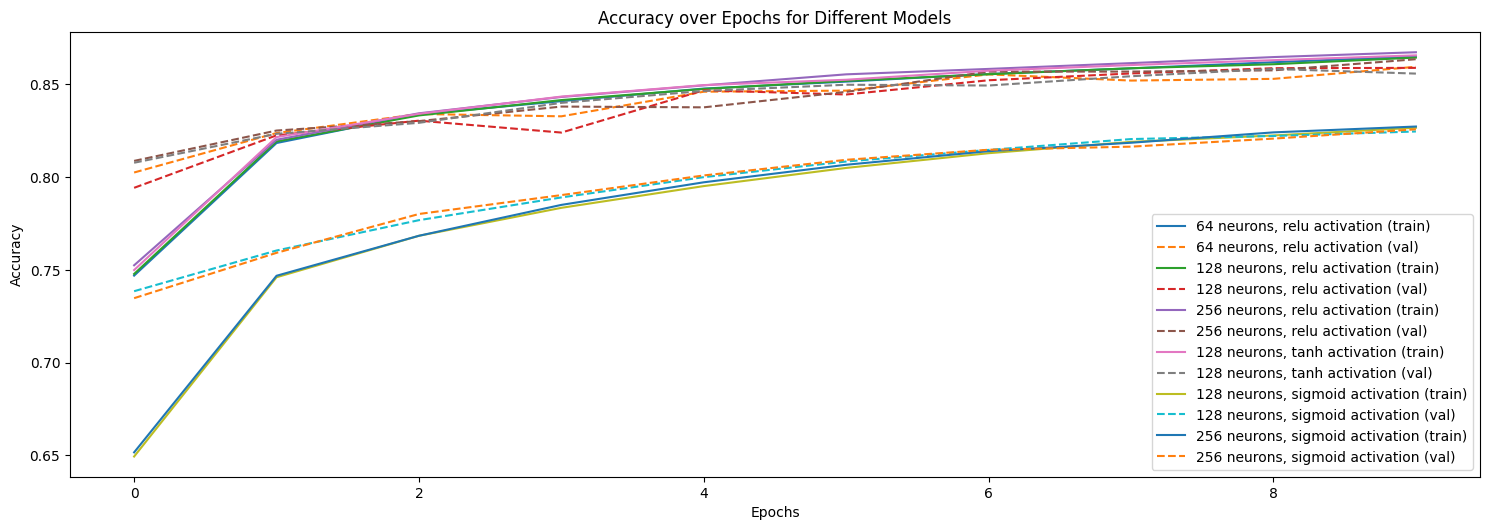

In [104]:
plt.figure(figsize=(15, 10))
for config, history in histories:
    plt.plot(history.history['loss'], label=f"{config['neurons']} neurons, {config['activation']} activation (train)")
    plt.plot(history.history['val_loss'], linestyle="--", label=f"{config['neurons']} neurons, {config['activation']} activation (val)")
plt.title('Loss over Epochs for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
for config, history in histories:
    plt.plot(history.history['accuracy'], label=f"{config['neurons']} neurons, {config['activation']} activation (train)")
    plt.plot(history.history['val_accuracy'], linestyle="--", label=f"{config['neurons']} neurons, {config['activation']} activation (val)")
plt.title('Accuracy over Epochs for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
def create_best_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),  
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [106]:
batch_sizes = [32, 64, 128]

In [107]:
histories = {}
for batch_size in batch_sizes:
    print(f"Training model with batch size: {batch_size}")
    model = create_best_model()
    history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2, verbose=0)
    histories[batch_size] = history

Training model with batch size: 32
Training model with batch size: 64
Training model with batch size: 128


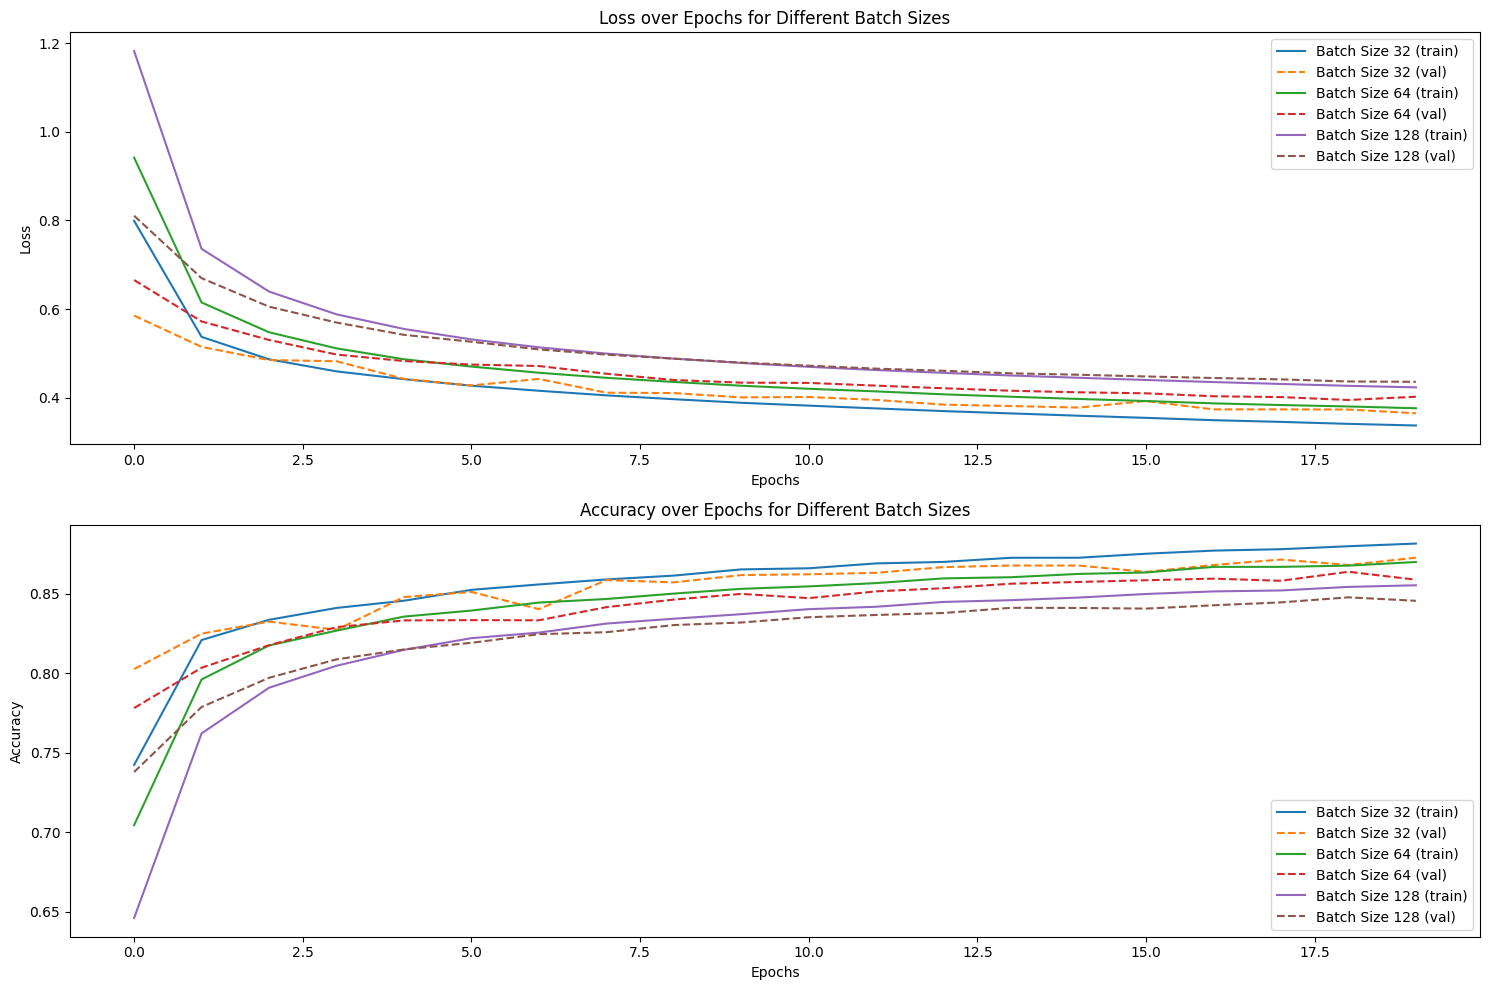

In [108]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for batch_size, history in histories.items():
    plt.plot(history.history['loss'], label=f"Batch Size {batch_size} (train)")
    plt.plot(history.history['val_loss'], linestyle="--", label=f"Batch Size {batch_size} (val)")
plt.title('Loss over Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
for batch_size, history in histories.items():
    plt.plot(history.history['accuracy'], label=f"Batch Size {batch_size} (train)")
    plt.plot(history.history['val_accuracy'], linestyle="--", label=f"Batch Size {batch_size} (val)")
plt.title('Accuracy over Epochs for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()